In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

Instructions for updating:
Use the retry module or similar alternatives.


In [288]:
mnist=input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [7]:
dir(mnist)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_fields',
 '_make',
 '_replace',
 '_source',
 'count',
 'index',
 'test',
 'train',
 'validation']

In [222]:
batch_xs,batch_ys=mnist.train.next_batch(100)

In [18]:
batch_xs.shape

(100, 784)

In [20]:
img=batch_xs[0].reshape(28,28)

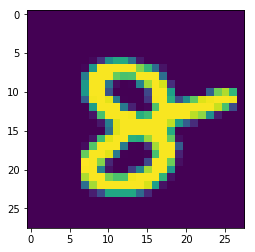

In [22]:
plt.imshow(img)

In [87]:
xs=tf.placeholder(tf.float32,[None,784])/255

In [88]:
a=sess.run(xs,feed_dict={xs:batch_xs})

In [89]:
a.shape

(100, 784)

In [86]:
a[0].mean(axis=None)

0.18746501

In [23]:
batch_ys[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [2]:
sess=tf.Session()

In [3]:
dir(input_data)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'division',
 'gzip',
 'numpy',
 'os',
 'print_function',
 'read_data_sets',
 'tempfile',
 'tf',
 'urllib',
 'xrange']

In [4]:
dir(input_data.read_data_sets)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__',
 '_tf_decorator']

In [5]:
help(input_data.read_data_sets)

Help on function read_data_sets in module tensorflow.contrib.learn.python.learn.datasets.mnist:

read_data_sets(train_dir, fake_data=False, one_hot=False, dtype=tf.float32, reshape=True, validation_size=5000, seed=None, source_url='https://storage.googleapis.com/cvdf-datasets/mnist/')
    DEPRECATED FUNCTION
    
    THIS FUNCTION IS DEPRECATED. It will be removed in a future version.
    Instructions for updating:
    Please use alternatives such as official/mnist/dataset.py from tensorflow/models.



In [290]:
xs=tf.placeholder(tf.float32,[None,784])/255
ys=tf.placeholder(tf.float32,[None,10])
keep_prob=tf.placeholder(tf.float32)
x_image=tf.reshape(xs,[-1,28,28,1])

In [8]:
w_conv1=tf.truncated_normal([5,5,1,32],stddev=0.1)

In [9]:
b_conv1=tf.constant(0.1,shape=[32])

In [11]:
sess.run(b_conv1)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1], dtype=float32)

In [12]:
sess.run(w_conv1).shape

(5, 5, 1, 32)

In [95]:
image=tf.reshape(batch_xs[0:5],[-1,28,28,1])

In [96]:
image.shape

TensorShape([Dimension(5), Dimension(28), Dimension(28), Dimension(1)])

In [98]:
image[0].shape

TensorShape([Dimension(28), Dimension(28), Dimension(1)])

In [102]:
image[0,:,:,0].shape

TensorShape([Dimension(28), Dimension(28)])

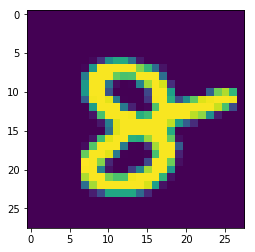

In [116]:
plt.imshow(sess.run(image[0,:,:,0]))

In [113]:
b=tf.nn.conv2d(image,w_conv1,strides=[1,1,1,1],padding='SAME')
b

<tf.Tensor 'Conv2D_3:0' shape=(5, 28, 28, 32) dtype=float32>

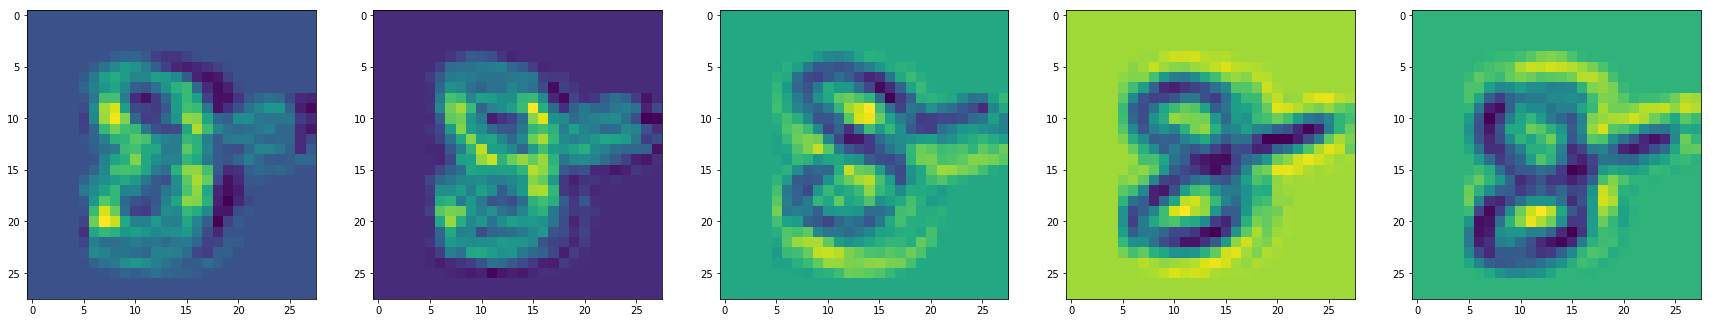

In [115]:
plt.figure('img',figsize=(30,30))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sess.run(b[0,:,:,i]))

In [119]:
c=b+tf.constant(0.1,shape=[32])
c

<tf.Tensor 'add_1:0' shape=(5, 28, 28, 32) dtype=float32>

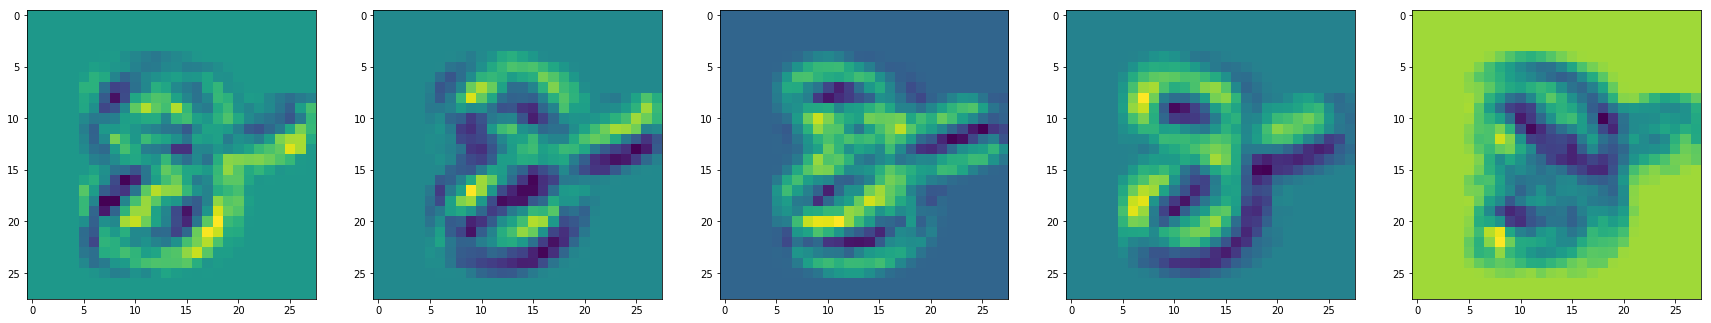

In [121]:
plt.figure('img',figsize=(30,30))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sess.run(c[0,:,:,i]))

In [120]:
d=tf.nn.relu(c)
d

<tf.Tensor 'Relu:0' shape=(5, 28, 28, 32) dtype=float32>

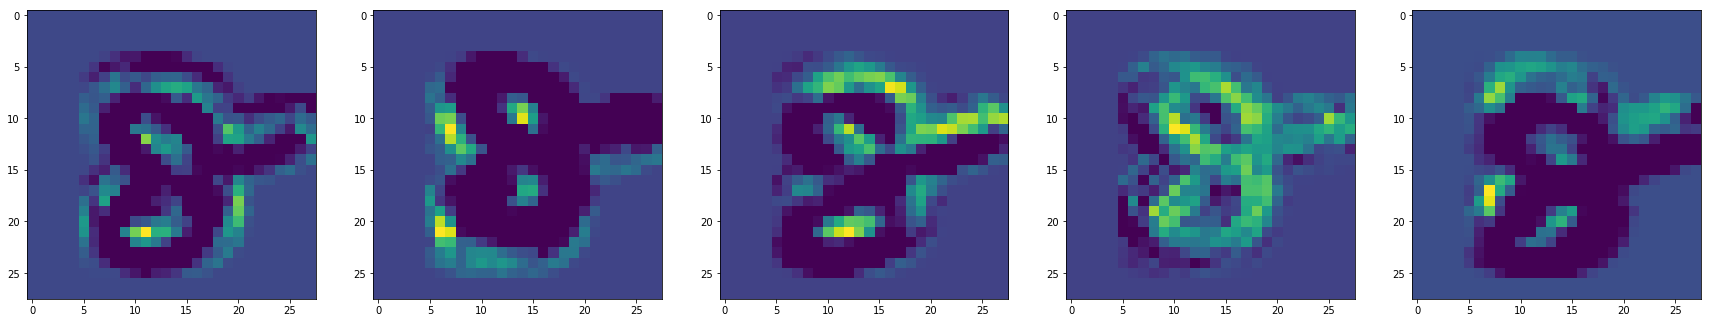

In [122]:
plt.figure('img',figsize=(30,30))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sess.run(d[0,:,:,i]))

In [123]:
e=tf.nn.max_pool(d,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
e

<tf.Tensor 'MaxPool:0' shape=(5, 14, 14, 32) dtype=float32>

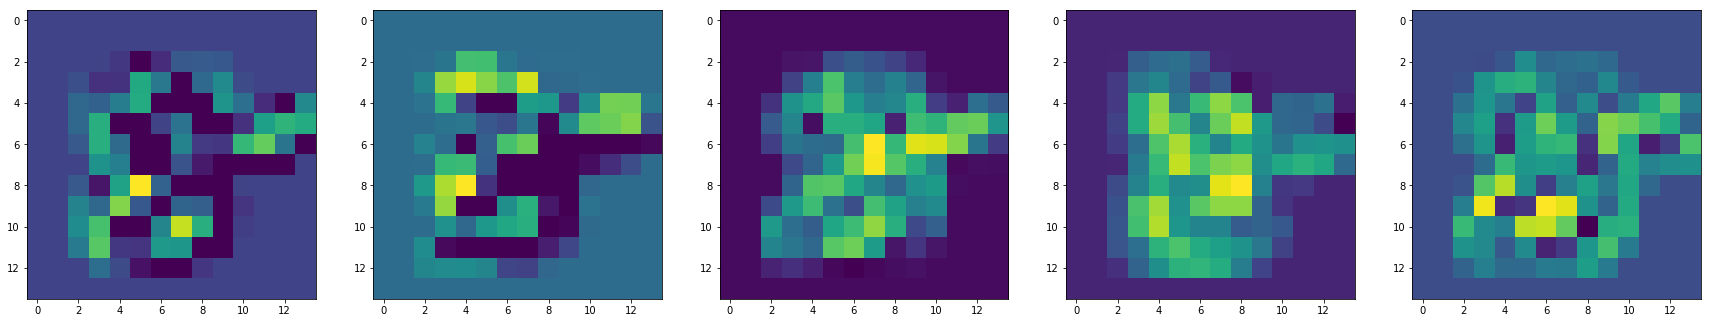

In [124]:
plt.figure('img',figsize=(30,30))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sess.run(e[0,:,:,i]))

In [291]:
x_image=tf.reshape(xs,[-1,28,28,1])

In [292]:
w_conv1=tf.Variable(tf.truncated_normal([5,5,1,32],stddev=0.1))
b_conv1=tf.Variable(tf.constant(0.1,shape=[32]))
c_conv1=tf.nn.relu(tf.nn.conv2d(x_image,w_conv1,strides=[1,1,1,1],padding='SAME')+b_conv1)
p_conv1=tf.nn.max_pool(c_conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [293]:
w_conv2=tf.Variable(tf.truncated_normal([5,5,32,64],stddev=0.1))
b_conv2=tf.Variable(tf.constant(0.1,shape=[64]))
c_conv2=tf.nn.relu(tf.nn.conv2d(p_conv1,w_conv2,strides=[1,1,1,1],padding='SAME')+b_conv2)
p_conv2=tf.nn.max_pool(c_conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [294]:
flatted=tf.reshape(p_conv2,[-1,7*7*64])

In [295]:
w_layer1=tf.Variable(tf.truncated_normal([7*7*64,1024],stddev=0.1))
b_layer1=tf.Variable(tf.constant(0.1,shape=[1024]))
o_layer1=tf.nn.dropout(tf.nn.relu(tf.matmul(flatted,w_layer1)+b_layer1),keep_prob)

In [296]:
w_layer2=tf.Variable(tf.truncated_normal([1024,10],stddev=0.1))
b_layer2=tf.Variable(tf.constant(0.1,shape=[10]))
o_layer2=tf.nn.softmax(tf.matmul(o_layer1,w_layer2)+b_layer2)

In [297]:
loss=tf.reduce_mean(-tf.reduce_sum(ys*tf.log(o_layer2),reduction_indices=[1]))

In [298]:
train=tf.train.AdamOptimizer(1e-4).minimize(loss)

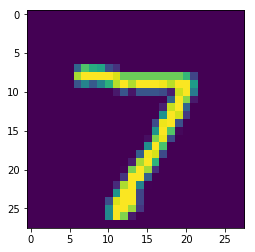

In [144]:
plt.imshow(mnist.test.images[0].reshape(28,28))

In [145]:
mnist.test.images.shape

(10000, 784)

In [299]:
accr=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(o_layer2,1),tf.argmax(ys,1)),tf.float32))

In [281]:
result=sess.run(accr,feed_dict={xs:mnist.test.images[:1000],ys:mnist.test.label[:1000],keep_prob:1})

AttributeError: 'DataSet' object has no attribute 'label'

In [300]:
sess.run(tf.initialize_all_variables())

In [301]:
for i in range(1000):
    batch_xs,batch_ys=mnist.train.next_batch(100)
    sess.run(train,feed_dict={xs:batch_xs,ys:batch_ys,keep_prob:0.5})
    if i%50==0:
        print(sess.run(accr,feed_dict={xs:mnist.test.images[:1000],ys:mnist.test.labels[:1000],keep_prob:1}))

0.127
0.755
0.854
0.881
0.905
0.909
0.928
0.932
0.937
0.943
0.947
0.943
0.953
0.953
0.957
0.959
0.965
0.966
0.965
0.966


下面开始另一项训练：保存及提取variable

In [4]:
saver=tf.train.Saver()

In [305]:
pwd

'C:\\Users\\DELL\\testing and learning\\selfize'

In [307]:
saver.save(sess,'variables/result.ckpt')###这个是保存

'variables/result.ckpt'

In [3]:
###下面是读取(为避免变量混淆，后面专开了一个文件做变量值读取)
peek_w_conv1=tf.Variable(tf.truncated_normal([5,5,1,32],stddev=0.1))
peek_b_conv1=tf.Variable(tf.constant(0.1,shape=[32]))
peek_w_conv2=tf.Variable(tf.truncated_normal([5,5,32,64],stddev=0.1))
peek_b_conv2=tf.Variable(tf.constant(0.1,shape=[64]))
peek_w_layer1=tf.Variable(tf.truncated_normal([7*7*64,1024],stddev=0.1))
peek_b_layer1=tf.Variable(tf.constant(0.1,shape=[1024]))
peek_w_layer2=tf.Variable(tf.truncated_normal([1024,10],stddev=0.1))
peek_b_layer2=tf.Variable(tf.constant(0.1,shape=[10]))

In [5]:
saver.restore(sess,'variables/result.ckpt')

INFO:tensorflow:Restoring parameters from variables/result.ckpt


In [6]:
sess.run(peek_b_layer2)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], dtype=float32)